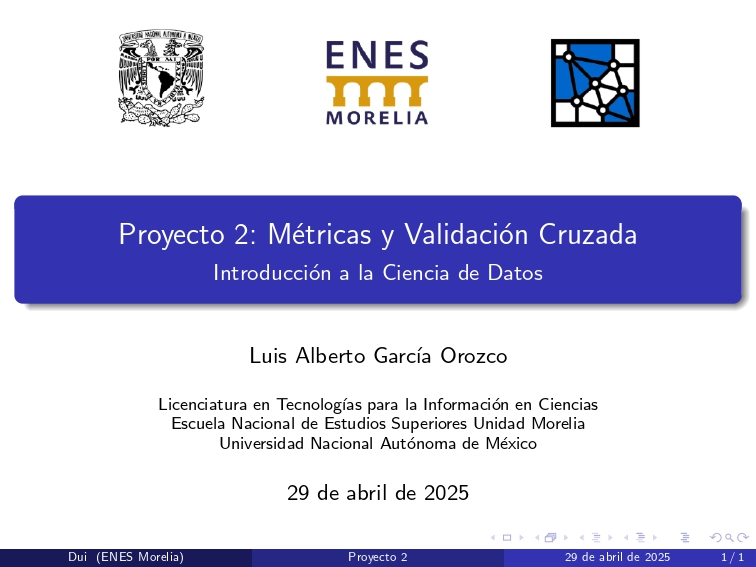

# Importaciones y funciones

En esta sección se importara lo necesario para el proyecto, y se prepararan las variables principales como la que almacena la base de datos.

In [1]:
import numpy as np                # Estas son las librerias principales del proyecto
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = 'cia_paises.xlsx'      # Se almacena la base de datos como "df"
df = pd.read_excel(filename)

# Data Wrangling
En esta sección se exploraran los datos y se dejaran listos para su uso en este proyecto.

## Datos atípicos
En esta sub-sección se localizan y se eliminan los datos atípicos de la base de datos

In [3]:
outliers_idx = df[df['GDP (USD)'] < 50].index
outliers_idx                       # Se guardan los indices de los outliers en el GPD

Index([  1,   8,  13,  30,  32,  48,  49,  50,  56,  65,  84, 101, 102, 116,
       158, 167, 176, 180, 188, 208, 210, 213, 217, 240, 247],
      dtype='int64')

In [4]:
df.drop(outliers_idx, axis = 0, inplace = True)
df[df['GDP (USD)'] < 50]            # Se eliminan las filas con los índices anteriores

,Name,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)


In [5]:
with open('cia_limpio.csv', 'w') as file:
    file.write(df.to_csv(index=False))         # Guardamos el archivo limpio para que los índices no 
                                    # sean un problema
df = pd.read_csv('cia_limpio.csv', )
df

,Name,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Afghanistan,Asia,652230,3.746641e+07,2065,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
1,Albania,Europe,28748,3.088385e+06,13965,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
2,Algeria,Africa,2381740,4.357669e+07,11511,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
3,American Samoa,Oceania,224,4.636600e+04,11200,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,NaN
4,Andorra,Europe,468,8.564500e+04,49900,3.70,3.70,41.0,0.8850,7.848300e+04,91.57,NaN,320.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,West Bank,Middle East,5860,2.949246e+06,6220,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,NaN
225,World,World,510.072 million sq km,7.772851e+09,17500,7.70,7.70,67.2,NaN,3.960000e+09,51.00,41820.0,64285009.0,2.21
226,Yemen,Middle East,527968,3.039924e+07,2500,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
227,Zambia,Africa,752618,1.907782e+07,3470,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


## Revisión de datos:

### Nombre

El Nombre parece ser un valor único que si razonamos, no deveria tener algo que ver en la desición de si un país tiene un PIB alto, medio o bajo.

In [6]:
df['Name'].nunique() == df.shape[0]

True

In [7]:
df = df.drop('Name', axis = 1)
df

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Asia,652230,3.746641e+07,2065,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
1,Europe,28748,3.088385e+06,13965,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
2,Africa,2381740,4.357669e+07,11511,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
3,Oceania,224,4.636600e+04,11200,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,NaN
4,Europe,468,8.564500e+04,49900,3.70,3.70,41.0,0.8850,7.848300e+04,91.57,NaN,320.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Middle East,5860,2.949246e+06,6220,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,NaN
225,World,510.072 million sq km,7.772851e+09,17500,7.70,7.70,67.2,NaN,3.960000e+09,51.00,41820.0,64285009.0,2.21
226,Middle East,527968,3.039924e+07,2500,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
227,Africa,752618,1.907782e+07,3470,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


### Continent

Y para facilitar el trabajo a los modelos, a la columna continente la convertiremos del tipo numérica.

In [8]:
df['Continent'].unique()  ## para esto usaremos la función get_dummies al final

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Central America and the Caribbean', 'South America',
       'Middle East', 'North America', 'Southeast Asia', 'European Union',
       'Arctic Region', 'AsiaEurope', 'World'], dtype=object)

In [26]:
df[df['Continent'] == 'World'] ## 510072000 parece un dato de área muy atípico, en general considerar World es
                               ## inecesario
df

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Asia,652230,3.746641e+07,igg_bajo,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
1,Europe,28748,3.088385e+06,igg_medio,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
2,Africa,2381740,4.357669e+07,igg_medio,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
3,Oceania,224,4.636600e+04,igg_medio,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,NaN
4,Europe,468,8.564500e+04,igg_alto,3.70,3.70,41.0,0.8850,7.848300e+04,91.57,NaN,320.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Middle East,5860,2.949246e+06,igg_medio,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,NaN
225,World,510.072 million sq km,7.772851e+09,igg_medio,7.70,7.70,67.2,NaN,3.960000e+09,51.00,41820.0,64285009.0,2.21
226,Middle East,527968,3.039924e+07,igg_bajo,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
227,Africa,752618,1.907782e+07,igg_bajo,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


### Area (km²)	

In [9]:
df['Area (km²)'].unique()

array(['652230', '28748', '2381740', '224', '468', '1246700', '91', '443',
       '2780400', '29743', '180', '7741220', '83871', '86600', '13880',
       '760', '148460', '430', '207600', '30528', '22966', '112622', '54',
       '38394', '1098581', '51197', '581730', '8515770', '151', '5765',
       '110879', '274200', '676578', '27830', '4033', '181035', '475440',
       '9984670', '264', '622984', '1.284', '756102', '9596960',
       '1138910', '2235', '2344858', '342000', '236', '51100', '322463',
       '56594', '110860', '444', '9251', '78867', '43094', '23200', '751',
       '48670', '283561', '1001450', '21041', '28051', '117600', '45228',
       '17364', '1104300', '4,236,351 sq km', '12173', '1393', '18274',
       '338145', '643801', '4167', '267667', '11300', '69700', '357022',
       '238533', '7', '131957', '2166086', '344', '544', '108889', '78',
       '245857', '36125', '214969', '27750', '112090', '1108', '93028',
       '103000', '3287263', '1904569', '1648195', '4383

### Population	

### GDP (USD)	

### Unemployment Rate

### Taxes (% of GDP)	

### External Debt (USD)	

### Exchange Rate (USD)	

### Internet Users	

### Internet Users Percentage of Population

### Airports	

### Roadways (km)	

### Militar Expenditures (% of GDP)

## Remplazar GDP por clasificación:

Ingreso bajo: $50 \le GDP \le 5000$

Ingreso medio: $5000 < GDP \le 25000$

Ingreso alto: $25000 < GDP$

In [10]:
ing_bajo_indx  = df[df['GDP (USD)'] <= 5000].index
ing_medio_indx = df[df['GDP (USD)'] <= 25000][df['GDP (USD)'] >  5000].index
ing_alto_indx  = df[df['GDP (USD)'] >  25000].index

df['GDP (USD)'][ing_bajo_indx]  = ['igg_bajo' for _ in range(len(ing_bajo_indx))] 
df['GDP (USD)'][ing_medio_indx] = ['igg_medio' for _ in range(len(ing_medio_indx))] # Hacemos los
df['GDP (USD)'][ing_alto_indx]  = ['igg_alto' for _ in range(len(ing_alto_indx))]   # cambios para
df                                                                                  # las clases

/tmp/ipykernel_4186/1384624988.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ing_medio_indx = df[df['GDP (USD)'] <= 25000][df['GDP (USD)'] >  5000].index
/tmp/ipykernel_4186/1384624988.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Asia,652230,3.746641e+07,igg_bajo,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
1,Europe,28748,3.088385e+06,igg_medio,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
2,Africa,2381740,4.357669e+07,igg_medio,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
3,Oceania,224,4.636600e+04,igg_medio,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,NaN
4,Europe,468,8.564500e+04,igg_alto,3.70,3.70,41.0,0.8850,7.848300e+04,91.57,NaN,320.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Middle East,5860,2.949246e+06,igg_medio,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,NaN
225,World,510.072 million sq km,7.772851e+09,igg_medio,7.70,7.70,67.2,NaN,3.960000e+09,51.00,41820.0,64285009.0,2.21
226,Middle East,527968,3.039924e+07,igg_bajo,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
227,Africa,752618,1.907782e+07,igg_bajo,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


## Imputing

In [11]:
columnas_por_cambiar = []
for columna in df.columns:
    miss = df[columna].isnull().sum()
    if miss > 0:
        print(f'La columna {columna} tiene {miss} valores faltantes')
        columnas_por_cambiar.append(columna)
    else:
        print(f'La columna {columna} NO tiene valores faltantes!')

La columna Continent NO tiene valores faltantes!
La columna Area (km²) NO tiene valores faltantes!
La columna Population NO tiene valores faltantes!
La columna GDP (USD) NO tiene valores faltantes!
La columna Unemployment Rate tiene 10 valores faltantes
La columna Taxes (% of GDP) tiene 10 valores faltantes
La columna External Debt (USD) tiene 18 valores faltantes
La columna Exchange Rate (USD) tiene 1 valores faltantes
La columna Internet Users tiene 4 valores faltantes
La columna Internet Users Percentage of Population tiene 4 valores faltantes
La columna Airports tiene 6 valores faltantes
La columna Roadways (km) tiene 6 valores faltantes
La columna Militar Expenditures (% of GDP) tiene 62 valores faltantes


In [12]:
columnas_por_cambiar

['Unemployment Rate',
 'Taxes (% of GDP)',
 'External Debt (USD)',
 'Exchange Rate (USD)',
 'Internet Users',
 'Internet Users Percentage of Population',
 'Airports',
 'Roadways (km)',
 'Militar Expenditures (% of GDP)']

In [13]:
from copy import deepcopy

In [14]:
df_ff = df.ffill()                    # rellenado con el método ffill
df_bf = df.bfill()                    # rellenado con el método bfill

df_mf = deepcopy(df)                  # Copia para rellenar con la media de cada columna

for columna in columnas_por_cambiar:
    media = df[columna].mean()
    df_mf[columna].fillna(media, inplace = True)

/tmp/ipykernel_4186/2209748525.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mf[columna].fillna(media, inplace = True)


# Validación cruzada

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
metricas = ['SGDClassifier', 'SVC', 'Decision Trees']

In [17]:
y = df['GDP (USD)']

## Ffill

Data frame llenado con los valores superiores a los faltantes

In [18]:
df_filled = df_ff
df_filled

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Asia,652230,3.746641e+07,igg_bajo,23.90,23.90,7.0,7.8700,4.717013e+06,13.50,46.0,34903.0,1.20
1,Europe,28748,3.088385e+06,igg_medio,5.83,5.83,71.8,102.4300,2.196613e+06,71.85,3.0,3945.0,1.30
2,Africa,2381740,4.357669e+07,igg_medio,11.70,11.70,27.5,131.0850,2.481953e+07,59.58,149.0,104000.0,6.00
3,Oceania,224,4.636600e+04,igg_medio,29.80,29.80,12.2,1.0000,1.700000e+04,31.30,3.0,241.0,6.00
4,Europe,468,8.564500e+04,igg_alto,3.70,3.70,41.0,0.8850,7.848300e+04,91.57,3.0,320.0,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Middle East,5860,2.949246e+06,igg_medio,27.90,27.90,24.4,3.6060,2.673000e+06,57.40,2.0,4686.0,2.30
225,World,510.072 million sq km,7.772851e+09,igg_medio,7.70,7.70,67.2,3.6060,3.960000e+09,51.00,41820.0,64285009.0,2.21
226,Middle East,527968,3.039924e+07,igg_bajo,27.00,27.00,74.5,275.0000,7.659884e+06,26.72,57.0,71300.0,4.30
227,Africa,752618,1.907782e+07,igg_bajo,15.00,15.00,63.1,21.0650,2.351646e+06,14.30,88.0,67671.0,1.20


In [19]:
X = df_filled.drop('GDP (USD)', axis = 1)

### SGDClassifier

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd_clf = SGDClassifier(random_state = 73)

param_grid = {
    'loss': ['log_loss', 'hinge', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [100, 500, 1000],
    'learning_rate': ['constant', 'invscaling'],
    'eta0': [0.01, 0.1, 0.2, 1, 0.001, 0.0001],
    'l1_ratio': [0.1, 0.5, 0.9],
    'tol': [1e-4,1e-3]
}

grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='accuracy')

#grid_search.fit(X, y)

### SVC

### Decision Trees

## Bfill

Data frame llenado con los valores inferiores a los faltantes

## Mfill

Data frame llenado con las medias de cada columna

## Pre-creación del archivo de comparación:

In [22]:
with open('validacion_cruzada.csv', 'w') as vc:
    vc.write('Métrica,Exactitud,Presición,Sensivilidad,F1\n')
    for i in range(3):
        vc.write(f'Métrica {i+1}: {metricas[i]}' + ','*4 + '\n')

pd.read_csv('validacion_cruzada.csv')

,Métrica,Exactitud,Presición,Sensivilidad,F1
0,Métrica 1: SGDClassifier,NaN,NaN,NaN,NaN
1,Métrica 2: SVC,NaN,NaN,NaN,NaN
2,Métrica 3: Decision Trees,NaN,NaN,NaN,NaN
